[0.19494614 0.16825075 0.6368031 ]
(5000, 3)
[0.09191055 0.82514702 0.08294243]


<Figure size 2800x1600 with 0 Axes>

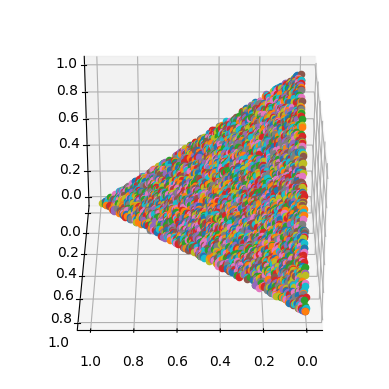

In [251]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d


figure(figsize=(14, 8), dpi=200)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(30.0, 90.0)
N_w = 5000
list_of_weights = []
for _ in range(N_w):
    weights = np.random.default_rng().exponential(1, 3)
    weights = weights/la.norm(weights, 1)
    list_of_weights.append(weights)
    x,y,z = weights
    ax.scatter3D(x,y,z)
print(weights)
print(np.shape(list_of_weights))
print(list_of_weights[2][:])

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import math


p = 0.02
W = int(1/p)+1
tau = np.hstack([np.arange(0.01, 2.0, 0.01),np.arange(2.0, 10.0, 0.01),np.arange(10,100,2), np.arange(100,500,5)])
N_tau = np.size(tau)
epsilon = np.arange(21)*0.05
epsilon = np.around(epsilon, decimals = 3)
N_eps = np.size(epsilon)

# these are the vertices now
mu = np.array([[0,0,1],
      [0,1,0],
      [1,0,0],
      [0.0,0.0,0.0]])
print(mu[:,1])
print(mu[1])
def softmax(mu, N_w):
    P = np.zeros((N_w,N_tau,4))
    for n_tau in range(N_tau):
        for n_w in range(N_w):
            weight = list_of_weights[n_w][:]
            # print(np.shape(mu), np.shape(weight))
            temp = tau[n_tau]*np.matmul(mu,weight)
            temp = temp - np.max(temp)
            P[n_w,n_tau,:] = np.exp(temp)/np.sum(np.exp(temp))
    return P
# print(np.shape(softmax(mu, N_w )))


def selective_attention(mu, N_w):
    P = np.zeros((N_w, N_tau, 4))
    for n_tau in range(N_tau):
        exp_x = np.exp(tau[n_tau]*(mu[:,0] - np.max(mu[:,0])))
        exp_y = np.exp(tau[n_tau]*(mu[:,1] - np.max(mu[:,1])))
        exp_z = np.exp(tau[n_tau]*(mu[:,2] - np.max(mu[:,2])))

        weight_x = exp_x/np.sum(exp_x)
        weight_y = exp_y/np.sum(exp_y)
        weight_z = exp_z/np.sum(exp_z)

        for n_w in range(N_w):
            w_x, w_y, w_z = list_of_weights[n_w][:]
            P[n_w, n_tau, :] = w_x*weight_x + w_y*weight_y + w_z*weight_z
    return np.round(P,3) 



[0. 1. 0. 0.]
[0. 1. 0.]


In [260]:
# temp = selective_attention(mu, N_w)
# print(temp)

In [261]:
ans_min = [0,0,0]
min_w, min_tau = 0,0
prob = softmax(mu, N_w)
# max_val = -1
# max_w, max_tau = 0,0
# for i in range(N_w):
#     for j in range(N_tau):
#         prob_col = prob[i,j,:]
#         if prob_col[-1] >max_val:
#             max_val = prob_col[-1]
#             max_w, max_tau = i,j
# print(max_val, max_w, max_tau)

def run(decision_maker, mu, prob):
    ans = np.zeros((3,N_w, N_tau))
    
    min_norm = 1000.0

    for n_tau, n_w in zip(range(N_tau), range(N_w)):
        # print(prob[n_w, n_tau,:], ' and ', mu)
        # print(np.shape(prob[n_w, n_tau,:]), ' and ', np.shape(mu))
        ans[:,n_w,n_tau] = np.matmul(prob[n_w,n_tau,:],mu)
        # print(ans[:,n_w,n_tau] )
        # print(np.linalg.norm(ans[:,n_w,n_tau],2) )
        if np.linalg.norm(ans[:,n_w,n_tau],2) < min_norm:
            min_norm = np.linalg.norm(ans[:,n_w,n_tau],2) 
            ans_min = ans[:,n_w,n_tau]
            min_w, min_tau = n_w, n_tau
            # print(min_w, min_tau)
            # print(ans_min)
    return ans
ans= run(softmax, mu, prob)

# print(min_w, min_tau)

In [262]:
print(np.shape(ans))
print(ans[2,5,11])
temp = np.where(ans == 0.0)
print(np.shape(temp))
xx,yy,zz = ans
print(xx[7,5])
centroid = np.mean(mu, axis=0)
print(centroid)
print(xx.shape)

for i in range(N_w):
    for j in range(N_tau):
        if xx[i,j] == 0.0 and yy[i,j] ==0.0 and zz[i,j] == 0.0:
            xx[i,j], yy[i,j], zz[i,j] = centroid




(3, 5000, 1124)
0.0
(3, 16856628)
0.0
[0.25 0.25 0.25]
(5000, 1124)


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


Text(0.5, 0, 'z')

<Figure size 4000x2400 with 0 Axes>

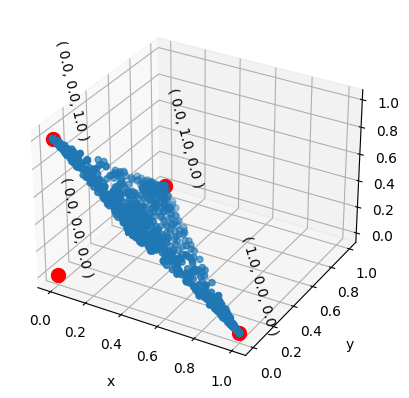

In [263]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d

figure(figsize=(20, 12), dpi=200)
fig = plt.figure()
ax = plt.axes(projection='3d')
print(mu)
# plot the 4 vertices with red
for i in range(4):
    x,y,z = mu[i]
    ax.plot3D(x,y,z ,c = 'red', marker = 'o', markersize = '10')
    label = '( '+ str(x) + ', ' + str(y) + ', ' + str(z) + ' )'
    ax.text(x,y,z , label, zdir = (-1,1,1))
# plot the feasible region for softmax


ax.scatter3D(xx,yy,zz,color =  '#1f77b4')
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=5)

Text(0.5, 0, 'z')

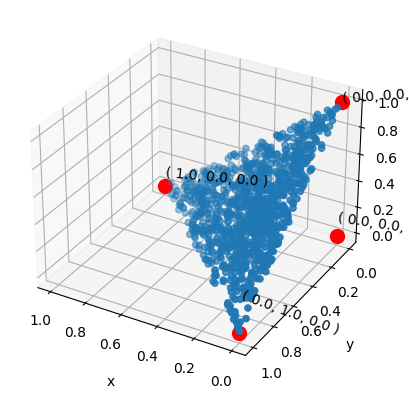

In [267]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(30.0, 120.0)
for i in range(4):
    x,y,z = mu[i]
    ax.plot3D(x,y,z ,c = 'red', marker = 'o', markersize = '10')
    label = '( '+ str(x) + ', ' + str(y) + ', ' + str(z) + ' )'
    ax.text(x,y,z , label, zdir = (-1,1,1))
# plot the feasible region for softmax


ax.scatter3D(xx,yy,zz,color =  '#1f77b4')
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=5)

In [264]:
prob = selective_attention(mu, N_w)
# max_val = -1
# max_w, max_tau = 0,0
# for i in range(N_w):
#     for j in range(N_tau):
#         prob_col = prob[i,j,:]
#         if prob_col[-1] >max_val:
#             max_val = prob_col[-1]
#             max_w, max_tau = i,j
# print(max_val, max_w, max_tau)

def run(decision_maker, mu, prob):
    ans = np.zeros((3,N_w, N_tau))
    
    min_norm = 1000.0

    for n_tau, n_w in zip(range(N_tau), range(N_w)):
        # print(prob[n_w, n_tau,:], ' and ', mu)
        # print(np.shape(prob[n_w, n_tau,:]), ' and ', np.shape(mu))
        ans[:,n_w,n_tau] = np.matmul(prob[n_w,n_tau,:],mu)
        # print(ans[:,n_w,n_tau] )
        # print(np.linalg.norm(ans[:,n_w,n_tau],2) )
        if np.linalg.norm(ans[:,n_w,n_tau],2) < min_norm:
            min_norm = np.linalg.norm(ans[:,n_w,n_tau],2) 
            ans_min = ans[:,n_w,n_tau]
            min_w, min_tau = n_w, n_tau
            # print(min_w, min_tau)
            # print(ans_min)
    return ans
ans= run(selective_attention, mu, prob)
print(np.shape(ans))
xx,yy,zz = ans
print(xx.shape)


(3, 5000, 1124)
(5000, 1124)


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


Text(0.5, 0, 'z')

<Figure size 2800x1600 with 0 Axes>

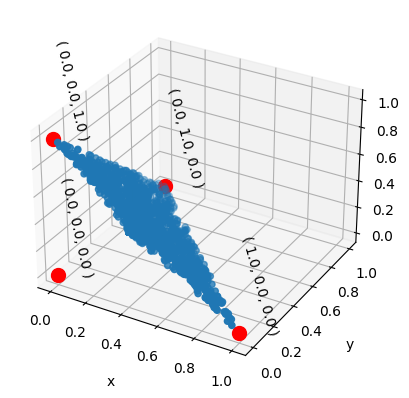

In [265]:
# import numpy as np
# from numpy import linalg as la
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# from mpl_toolkits import mplot3d

figure(figsize=(14, 8), dpi=200)
fig = plt.figure()
ax = plt.axes(projection='3d')
print(mu)
# plot the 4 vertices with red
for i in range(4):
    x,y,z = mu[i]
    ax.plot3D(x,y,z ,c = 'red', marker = 'o', markersize = '10')
    label = '( '+ str(x) + ', ' + str(y) + ', ' + str(z) + ' )'
    ax.text(x,y,z , label, zdir = (-1,1,1))
# plot the feasible region for softmax
for i in range(N_w):
    for j in range(N_tau):
        if xx[i,j] == 0.0 and yy[i,j] ==0.0 and zz[i,j] == 0.0:
            xx[i,j], yy[i,j], zz[i,j] = centroid


ax.scatter3D(xx,yy,zz,color =  '#1f77b4')
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=5)